# Regresión polinómica

La principal diferencia entre la regresión polinómica y la regresión lineal es la forma de la relación funcional que están modelando.

Mientras que la regresión lineal modela relaciones lineales directas entre las variables, la regresión polinómica permite modelar relaciones no lineales introduciendo términos polinómicos. Al aumentar el grado del polinomio, la regresión polinómica puede capturar patrones más complejos en los datos. Sin embargo, es importante tener cuidado con el sobreajuste al seleccionar el grado del polinomio, ya que un grado demasiado alto puede llevar a un ajuste excesivo a los datos de entrenamiento y a una falta de generalización a nuevos datos.

1. **Regresión Lineal:**
    - La regresión lineal modela una relación lineal entre la variable dependiente $y$ y las variables predictoras $X$. La ecuación general de un modelo de regresión lineal simple es:
    
    $$
    y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \varepsilon
    $$
    
    - Aquí, $\beta_0$ es el intercepto, $\beta_1, \beta_2, \ldots, \beta_n$ son los coeficientes de las variables predictoras, $X_1, X_2, \ldots, X_n$, y $\varepsilon$ es el término de error.
2. **Regresión Polinómica:**
    - La regresión polinómica permite modelar relaciones no lineales mediante la introducción de términos polinómicos. Un modelo de regresión polinómica de segundo grado (cuadrático) tiene la forma:
    
    \begin{equation}
    y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon
    \end{equation}
    
    - Aquí, $\beta_0$ es el intercepto, $\beta_1$ y $\beta_2$ son los coeficientes, $X$ es la variable predictora, $X^2$ es el término polinómico de segundo grado, y $\varepsilon$ es el término de error.

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Dell\PyhtonIA\Machine Learning\hormigon.csv")

In [3]:
descripcion = data.describe(include = "all").T
print(descripcion)

               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Normalización

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

from sklearn.model_selection import train_test_split
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Si no se desea usar datos normalizados ejecutar esta celda para recuperar los originales

In [6]:
datos_normalizados = data.copy()

In [7]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
# Separar las variables dependiente e independientes
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis=1)

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Aplicar regresión polinómica de segundo grado (puedes ajustar el grado según tus necesidades)
grado_polynomial = 2
poly_features = PolynomialFeatures(degree=grado_polynomial)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [12]:
X_test.shape

(258, 8)

In [13]:
X_test_poly.shape

(258, 45)

La razón por la que `X_test_poly` tiene más columnas que `X_test` está relacionada con la transformación polinómica que se realiza utilizando `PolynomialFeatures` en scikit-learn.

Cuando aplicas `PolynomialFeatures` con un grado específico (por ejemplo, `degree=2`), este transformador genera todas las combinaciones polinómicas de las variables originales hasta ese grado. Si tienes \(n\) variables originales, generaría todas las combinaciones de pares (hasta el grado especificado) y las incluiría como nuevas características.

En tu caso, parece que `X_test` tiene 8 columnas originales, y cuando aplicas `PolynomialFeatures(degree=2)`, se generan todas las combinaciones polinómicas hasta el cuadrático. Esto puede dar lugar a un mayor número de columnas en `X_test_poly`. La fórmula general para el número total de características después de la transformación polinómica es:

$$\text{Número de características polinómicas} = \frac{(n + d)!}{n! \cdot d!} $$

donde \(n\) es el número de características originales y \(d\) es el grado del polinomio.

Si deseas ver las características específicas generadas por `PolynomialFeatures`, puedes acceder al atributo `get_feature_names_out`:

Esto te dará los nombres de todas las características en `X_test_poly`, y podrás observar las combinaciones polinómicas generadas.

In [14]:
poly_feature_names = poly_features.get_feature_names_out(X.columns)
print(poly_feature_names)

['1' 'cement' 'slag' 'ash' 'water' 'superplastic' 'coarseagg' 'fineagg'
 'age' 'cement^2' 'cement slag' 'cement ash' 'cement water'
 'cement superplastic' 'cement coarseagg' 'cement fineagg' 'cement age'
 'slag^2' 'slag ash' 'slag water' 'slag superplastic' 'slag coarseagg'
 'slag fineagg' 'slag age' 'ash^2' 'ash water' 'ash superplastic'
 'ash coarseagg' 'ash fineagg' 'ash age' 'water^2' 'water superplastic'
 'water coarseagg' 'water fineagg' 'water age' 'superplastic^2'
 'superplastic coarseagg' 'superplastic fineagg' 'superplastic age'
 'coarseagg^2' 'coarseagg fineagg' 'coarseagg age' 'fineagg^2'
 'fineagg age' 'age^2']


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_poly)

In [18]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
# Imprimir las métricas de rendimiento
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 66.973549229853
R-squared (R²): 0.7518209566808842


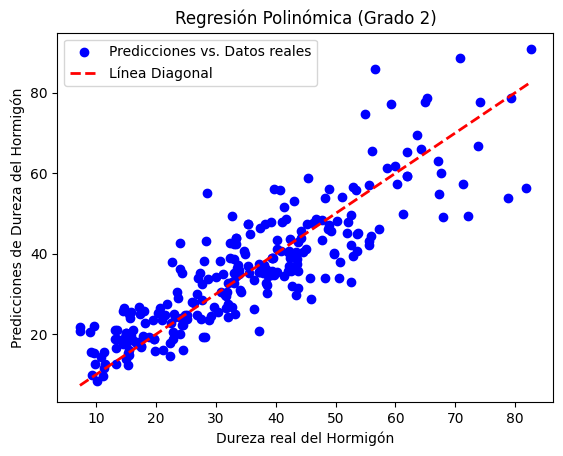

In [19]:
import matplotlib.pyplot as plt

# Visualizar los resultados
plt.scatter(y_test, y_pred, color='blue', label='Predicciones vs. Datos reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Línea Diagonal')
plt.title(f'Regresión Polinómica (Grado {grado_polynomial})')
plt.xlabel('Dureza real del Hormigón')
plt.ylabel('Predicciones de Dureza del Hormigón')
plt.legend()
plt.show()

Recuerda que al aumentar el grado del polinomio, puedes ajustar mejor los datos de entrenamiento, pero también corres el riesgo de sobreajuste. Es importante evaluar el rendimiento del modelo en un conjunto de prueba para asegurarte de que generalice bien a datos no vistos.